In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from joblib import dump

In [2]:
from pathlib import Path
my_csv = Path("/home/cefika/Desktop/ip1/marketing_campaign.csv")
data = pd.read_csv(my_csv.resolve(), sep='\t')

<font size="5">Velicina skupa podataka i opis podataka</font>

In [3]:
print("Number of rows (instances): ", data.shape[0])
print("Number of columns (attributes): ", data.shape[1])

Number of rows (instances):  2240
Number of columns (attributes):  29


In [4]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


<font size="5">Rad sa NULL vrednostima</font>

In [7]:
data.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [8]:
inc_med = data['Income'].median()
data['Income'].fillna(inc_med, inplace=True)

<font size="5">Rad sa elementima van granice i obradjivanje atributa<font>

In [9]:
data["Age"] = 2023-data["Year_Birth"]

#UKUPNO POTROSENO PARA NA VINO MESO RIBU...
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#RAZVRSTAVAM TAKO DA IMAM SAMO 2 SITUACIJE DA NEKO ZIVI SA NEKIM ILI JE SAM
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#PRAVIMO JEDNU TABELU ZA SVU DECU
data["Children"]=data["Kidhome"]+data["Teenhome"]

#UKUPNI CLAN/OVI PORODICE
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#DA LI NEKO IMA DECE
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#OBRAZOVANJE DELIMO U GRUPE
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#UKUPNA KUPOVINA WEB PRODZA KATALOG...
data['NumTotalPurchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']

#DA LI JE NEKO PRIHVATIO PONUDU ILI NE
data['Totalacp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']
data['Totalacp']=np.where(data.Totalacp>0,1,0)

#ULEPSAVANJE
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#DATUM
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)


days = []
d1 = max(dates)
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

<font size="5">Brisanje ne bitnih atributa</font>

In [10]:
to_drop = ['Response','Complain',"Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID", 
           "Kidhome", "Teenhome",'AcceptedCmp1',
           'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumDealsPurchases']
data = data.drop(to_drop, axis=1)
data.reset_index(drop=True,inplace=True)

<font size='5'>Rad sa elementima van granice koristicu kvantile</font>

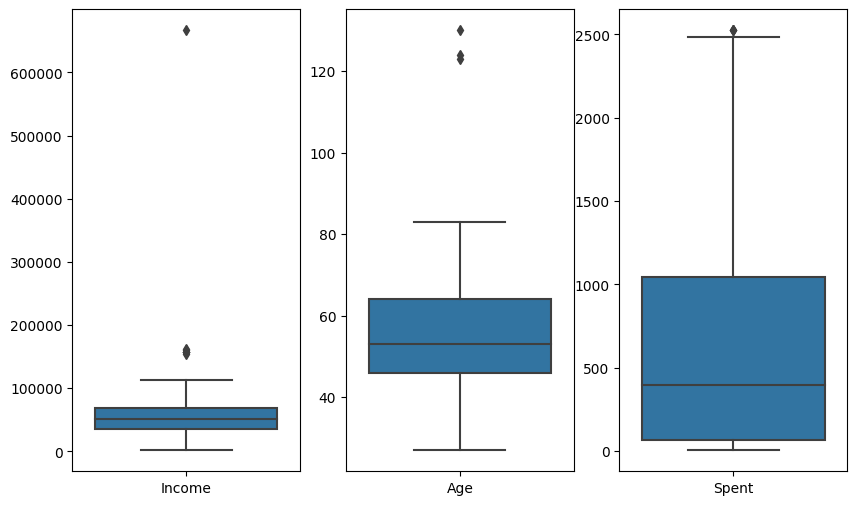

In [11]:
fig,ax = plt.subplots(1,3,figsize=(10,6))
plt.subplot(1,3,1)
sns.boxplot(data[["Income"]])

plt.subplot(1,3,2)
sns.boxplot(data[["Age"]])

plt.subplot(1,3,3)
sns.boxplot(data[["Spent"]])
plt.show()

In [12]:
cols = ["Income","Age","Spent"]

for i in cols:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3-q1
    
    outliers = data[(data[i]<(q1-1.5*iqr)) | (data[i]>(q3+1.5*iqr))]
    
    #remove the outliers
    data = data[~((data[i]<(q1-1.5*iqr)) | (data[i]>(q3+1.5*iqr)))]
print("Remaining rows :",len(data))
data.reset_index(drop=True,inplace=True)

Remaining rows : 2226


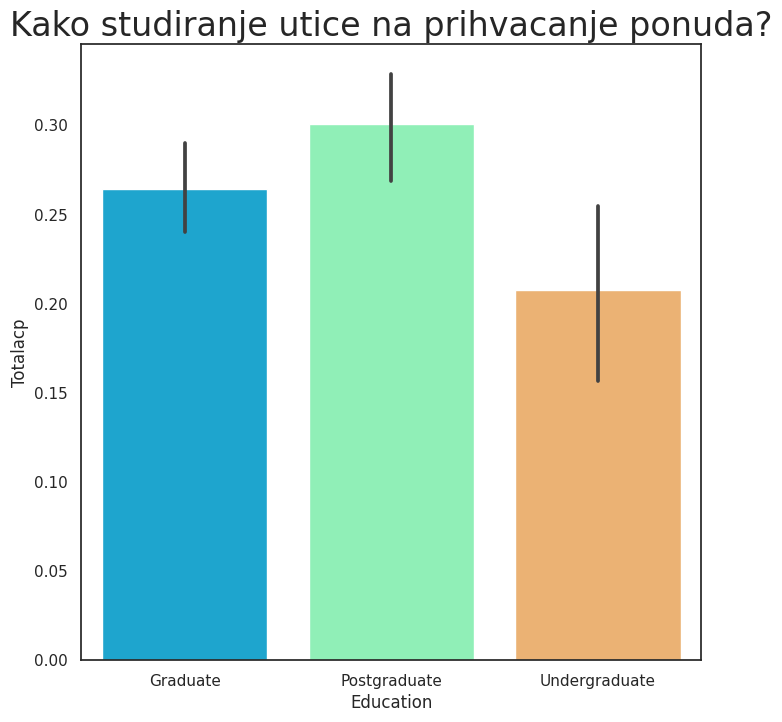

In [13]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("Kako studiranje utice na prihvacanje ponuda?",fontsize=24)
ax = sns.barplot(x="Education", y="Totalacp", data=data,palette="rainbow")

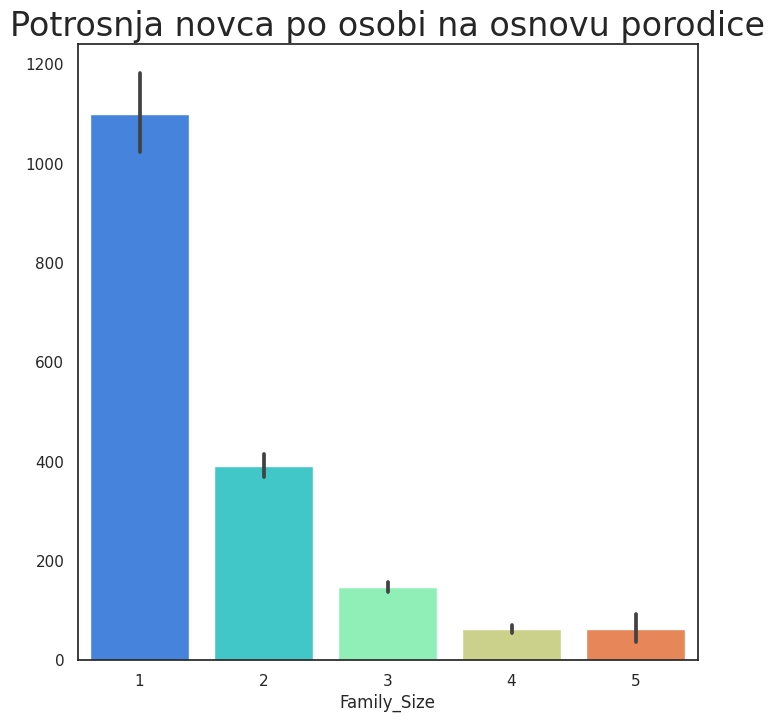

In [14]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("Potrosnja novca po osobi na osnovu porodice",fontsize=24)
tmy=data["Spent"]/data['Family_Size']
ax = sns.barplot(x="Family_Size", y=tmy, data=data,palette="rainbow")

<font size='5'>Rad sa 'object' atributima</font>

In [15]:
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(col)
    print(data[col].unique())

Education
['Graduate' 'Postgraduate' 'Undergraduate']
Living_With
['Alone' 'Partner']


In [16]:
le = LabelEncoder()
data["Education"] = le.fit_transform(data["Education"])
data["Living_With"] = le.fit_transform(data['Living_With'])
data.dtypes

Education              int64
Income               float64
Recency                int64
Wines                  int64
Fruits                 int64
Meat                   int64
Fish                   int64
Sweets                 int64
Gold                   int64
NumWebVisitsMonth      int64
Age                    int64
Spent                  int64
Living_With            int64
Children               int64
Family_Size            int64
Is_Parent              int64
NumTotalPurchases      int64
Totalacp               int64
Customer_For           int64
dtype: object

<font size='5'>Svi atributi sredjeni</font>

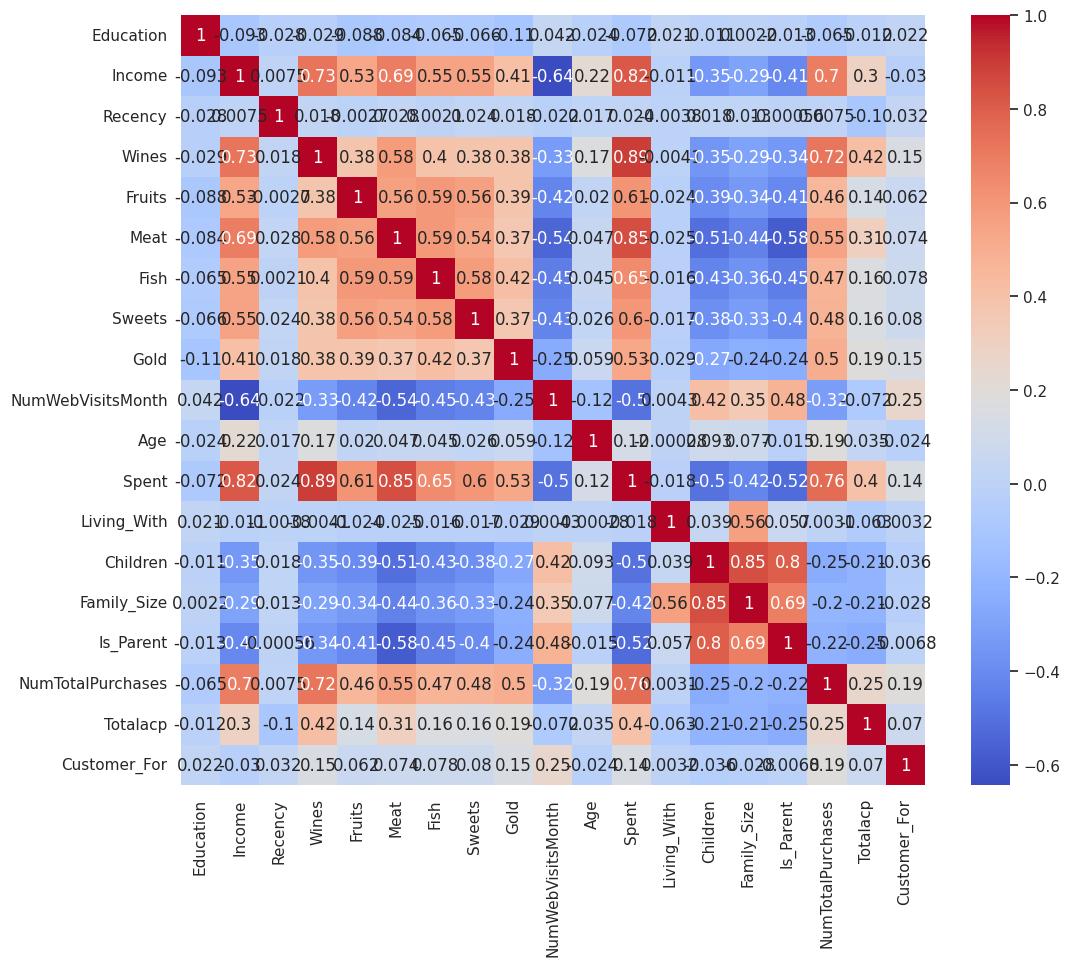

In [17]:
matrica_korelacije = data.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(matrica_korelacije, annot=True, cmap='coolwarm')

plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

<font size=5>Odnos ljudi koji su prihvatili(608) ponudu nekad ili ne(1621)</font>

<function matplotlib.pyplot.show(close=None, block=None)>

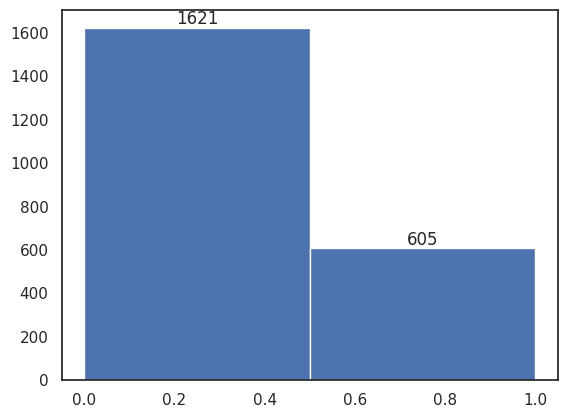

In [18]:
from sklearn.feature_selection import SelectKBest, chi2
X=data.drop(['Totalacp'], axis=1)
y=data['Totalacp']
freq, bins, _ = plt.hist(y, edgecolor='white', bins=2)

bin_centers = np.diff(bins)*0.5 + bins[:-1] # računanje centra korpice

for fr, x in zip(freq, bin_centers):
    height = int(fr)
    plt.annotate("{}".format(height),
               xy = (x, height),             # poziciranje broja iznad korpice
               xytext = (0,0.2),             # odvajanje teksta od korpice
               textcoords = "offset points", 
               ha = 'center', va = 'bottom'
               )
    
plt.show

<font size=5>Podela skupa podataka na trening i test a zatim vrsim normalizaciju</font>

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(data=X_test_scaled, columns=X_test.columns)

In [21]:
X_train.describe()

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent,NumTotalPurchases,Customer_For
count,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000
mean,0.301378,0.445570,0.502611,0.205118,0.128976,0.102241,0.145585,0.105550,0.121843,0.266567,0.480977,0.242095,0.642900,0.318155,0.399341,0.720192,0.381143,0.486637
std,0.338308,0.183744,0.292711,0.224268,0.192618,0.134861,0.211560,0.160055,0.145370,0.121416,0.209737,0.241235,0.479288,0.250039,0.226688,0.449039,0.193721,0.219199
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.303328,0.252525,0.016745,0.010050,0.009956,0.011628,0.003802,0.024862,0.150000,0.321429,0.026199,0.000000,0.000000,0.250000,0.000000,0.205128,0.324553
50%,0.000000,0.443225,0.505051,0.120563,0.040201,0.042315,0.046512,0.034221,0.066298,0.300000,0.464286,0.159613,1.000000,0.333333,0.500000,1.000000,0.384615,0.488241
75%,0.500000,0.592800,0.757576,0.338245,0.165829,0.141257,0.193798,0.133080,0.151934,0.350000,0.660714,0.416364,1.000000,0.333333,0.500000,1.000000,0.538462,0.652869
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
dump((X_train, X_test, y_train, y_test), 'classification_data.joblib')

['classification_data.joblib']

In [23]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(data=X_scaled, columns=X.columns)

In [24]:
dump((X, y), 'clustering_data.joblib')

['clustering_data.joblib']